## Learning Word Vectors with TensorFlow:  Hyperparameter Tuning
### Layer Sizes and Learning Rate
*Patrick Coady (pcoady@alum.mit.edu)*

This notebook explores:
1. Embedding Layer and Hidden Layer sizes
2. Learning rates with RMSProp optimizer

The size the hidden layer ("nce_weights": hidden layer to softmax) has the greatest impact on model performance. The size of the embedding layer ("embed_weights") is less important. Changing the embedding layer size from 32 to 128 only marginally improves performance. However dropping the hidden layer size from 128 to 64 hurts performance significantly.  

With embed_size = 128, hid_size = 128, the model does have the capacity to over-fit the training data. While the validation loss does not actually start to increase, the training loss significantly diverges from the validation loss.

A learning rate of 0.003 looks best, with learning completing at around 100 epochs.

I also took a quick look at batch size (plots not included). A batch size of 32 performed better than 64 (both in learning rate and final training loss).

In [1]:
from wordvector import WordVector
from windowmodel import WindowModel
from plot_util import plot_results
import docload

import numpy as np
import sklearn.utils

In [2]:
files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']
word_array, dictionary, num_lines, num_words = docload.build_word_array(
    files, vocab_size=50000, gutenberg=True)
print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

Document loaded and processed: 24080 lines, 247812 words.


## Layer Sizes: Embedding Layer and Hidden Layer

embed_size = {32, 64, 128}  
hid_size = {32, 64, 128}

In [3]:
x, y = WindowModel.build_training_set(word_array)

# shuffle and split 10% validation data
x_shuf, y_shuf = sklearn.utils.shuffle(x, y, random_state=0)
split = round(x_shuf.shape[0]*0.9)
x_val, y_val = (x_shuf[split:, :], y_shuf[split:, :])
x_train, y_train = (x[:split, :], y[:split, :])
results_list = []

count = 0
for embed_size in [32, 64, 128]:
    for hid_size in [32, 64, 128]:
        print('{}) embed size = {}, hid_size = {}'.format(count,embed_size, hid_size))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': embed_size,
                        'hid_size': hid_size,
                        'neg_samples': 64,
                        'learn_rate': 0.003,
                        'embed_noise': 0.1,
                        'hid_noise': 0.1,                        
                        'optimizer': 'RMSProp'}
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=80, verbose=False)
        results_list.append((graph_params, results))

0) embed size = 32, hid_size = 32
End Training: total batches = 557520. train loss = 5.00, val loss = 5.02
1) embed size = 32, hid_size = 64
End Training: total batches = 557520. train loss = 2.76, val loss = 2.78
2) embed size = 32, hid_size = 128
End Training: total batches = 557520. train loss = 1.91, val loss = 2.03
3) embed size = 64, hid_size = 32
End Training: total batches = 557520. train loss = 5.00, val loss = 5.02
4) embed size = 64, hid_size = 64
End Training: total batches = 557520. train loss = 2.32, val loss = 2.37
5) embed size = 64, hid_size = 128
End Training: total batches = 557520. train loss = 1.29, val loss = 1.57
6) embed size = 128, hid_size = 32
End Training: total batches = 557520. train loss = 5.00, val loss = 5.02
7) embed size = 128, hid_size = 64
End Training: total batches = 557520. train loss = 2.00, val loss = 2.10
8) embed size = 128, hid_size = 128
End Training: total batches = 557520. train loss = 1.11, val loss = 1.43


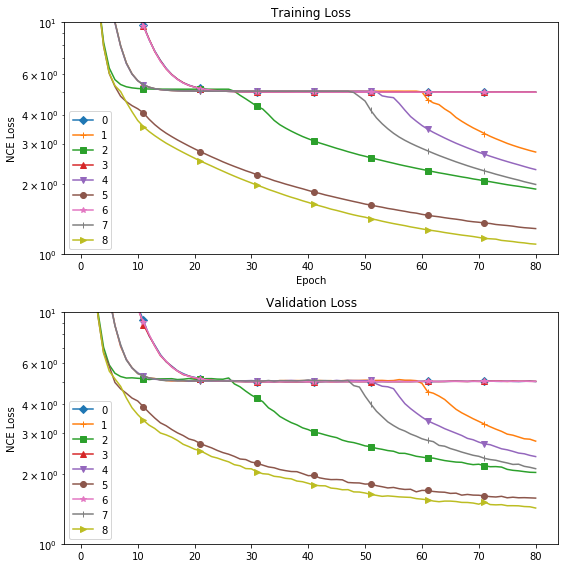

In [4]:
plot_results(results_list)

## Learning Rate
Try combinations of:
- learn_rate = {0.0003, 0.001, 0.003, 0.01, 0.02}
- embed_size = hid_size = {64, 128}

*Note 1: batch_size of 64 was found to be worse than 32.*  
*Note 2: noticed high run-to-run variation even with no parameter changes: I had mistakenly iterated through learning rates, but didn't actually assign them to the model parameters.* 

In [ ]:
results_list2 = []

count = 0
for learn_rate in [0.0003, 0.001, 0.003, 0.01, 0.03]:
    for he_size in [64, 128]:
        print('{}) learn_rate = {}, hid_size = embed_size = {}'
              .format(count, learn_rate, he_size))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': he_size,
                        'hid_size': he_size,
                        'neg_samples': 64,
                        'learn_rate': learn_rate,
                        'embed_noise': 0.1,
                        'hid_noise': 0.1,                        
                        'optimizer': 'RMSProp'} 
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=120, verbose=False)
        results_list2.append((graph_params, results))

0) learn_rate = 0.0003, hid_size = embed_size = 64
End Training: total batches = 836280. train loss = 4.98, val loss = 4.98
1) learn_rate = 0.0003, hid_size = embed_size = 128


In [ ]:
plot_results(results_list2)